## №2 Differentiation


Используя правую и центральные разности численно вычислить первую производную f(x) на отрезке [a, b] в узлах сетки. Используя центральные разности, вычислить вторую производную функции f(x) со вторым и четвертым порядком точности в узлах сетки

$$f(x) = e^{-x^2}ln(x^2+1)$$
$$x\in [-3, 3]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = -3 # interval start
b = 3 # interval end
h = 0.001 # step

___________

In [3]:
def function(x):
    return np.exp(-x**2)*np.log(x**2 + 1)

In [4]:
def function_first_der(x):
    return (2*x*np.exp(-x**2)*(1-np.log(x**2 + 1)*(x**2 + 1)))/(x**2 + 1)

In [5]:
def function_second_der(x):
    return (np.exp(-x**2)*(-8*x**4-10*x**2+(4*x**6+6*x**4-2)*np.log(x**2+1)+2))/((x**2+1)**2)

________________________________

In [6]:
#first derivative, central difference, второй порядок точности
def central_diff(x, h):
    return (function(x+h) - function(x-h))/(2*h)

In [7]:
#первая производная, правые разности
def right_diff(x, h):
    return (function(x+h) - function(x))/h

In [8]:
#вторая производная, центральные разности, второй порядок точности
def central_diff_sec_order2(x, h):
    return (function(x+h)-2*function(x)+function(x-h))/(h**2)

In [9]:
#вторая производная, центральные разности, четвертый порядок точности
def central_diff_sec_order4(x, h):
    return (-function(x-2*h)+16*function(x-h)-30*function(x)+16*function(x+h)-function(x+2*h))/(12*h**2)

-----------------

## First derivative

In [10]:
# graph f(x)
x = np.arange(a, b, 0.01)
y = function(x)

x_derivative_cent = np.arange(a, b, 0.01)
y_derivative_cent = central_diff(x_derivative_cent, h)

x_derivative_right = np.arange(a, b, 0.01)
y_derivative_right = right_diff(x_derivative_right, h)

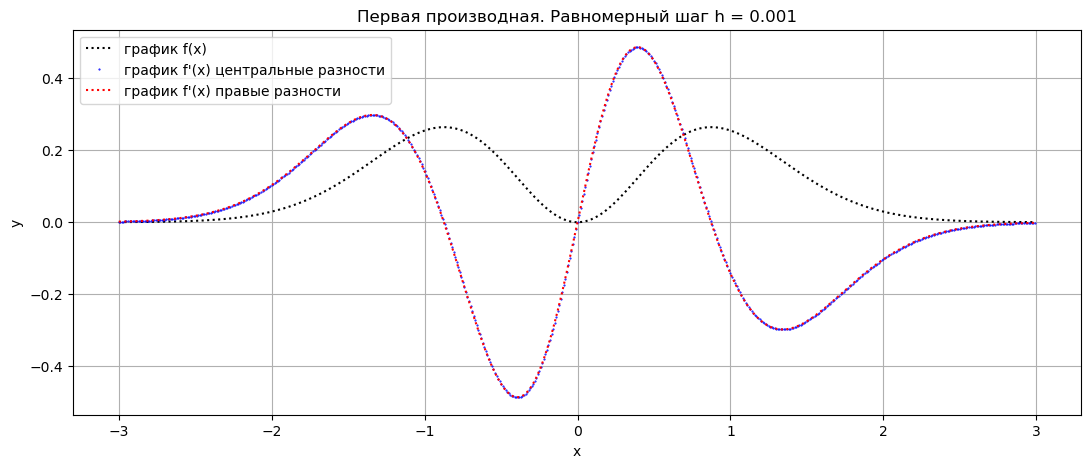

In [11]:
fig = plt.figure(figsize=(13,5)) 

# graph f(x)
plt.plot(x, y, ':', color="black", label="график f(x)")
plt.plot(x_derivative_cent, y_derivative_cent, '.', ms=1, color='blue', label="график f'(x) центральные разности")
plt.plot(x_derivative_right, y_derivative_right, ':', color='red', label="график f'(x) правые разности")

plt.title(f'Первая производная. Равномерный шаг h = {h}')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

Text(0.5, 0.98, "Абсолютная погрешность f'(x).  Шаг сетки h = 0.001")

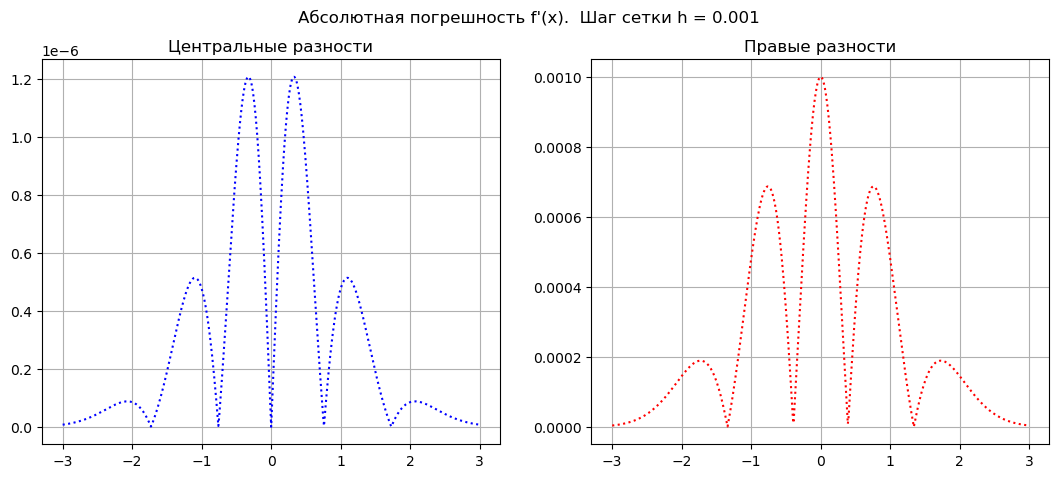

In [12]:
x_first_der = np.arange(a, b, 0.01)
y_first_der = function_first_der(x_first_der)

x_derivative_cent = np.arange(a, b, 0.01)
y_derivative_cent = central_diff(x_derivative_cent, h)

x_derivative_right = np.arange(a, b, 0.01)
y_derivative_right = right_diff(x_derivative_right, h)

fig, axs = plt.subplots(1, 2, figsize=(13,5))

#график абсолютной погрешности f'(x)
axs[0].plot(x_derivative_cent, abs(y_derivative_cent - y_first_der), ':', color='blue', label="абс. погр. центральных разностей")
axs[0].set_title("Центральные разности")
axs[0].grid(True)
axs[1].plot(x_derivative_right, abs(y_derivative_right - y_first_der), ':', color='red', label="абс. погр. правые разности")
axs[1].set_title("Правые разности")
axs[1].grid(True)
fig.suptitle(f'Абсолютная погрешность f\'(x).  Шаг сетки h = {h}')

## Вторая производная

In [13]:
y = function(x)

#график функции f(x)
x = np.arange(a, b, 0.01)

#график функции f''(x)
y_2derivative = function_second_der(x)

#второй порядок точности
y_2derivative_order2 = central_diff_sec_order2(x, h)

#четвертый порядок точности
y_2derivative_order4 = central_diff_sec_order4(x, h)

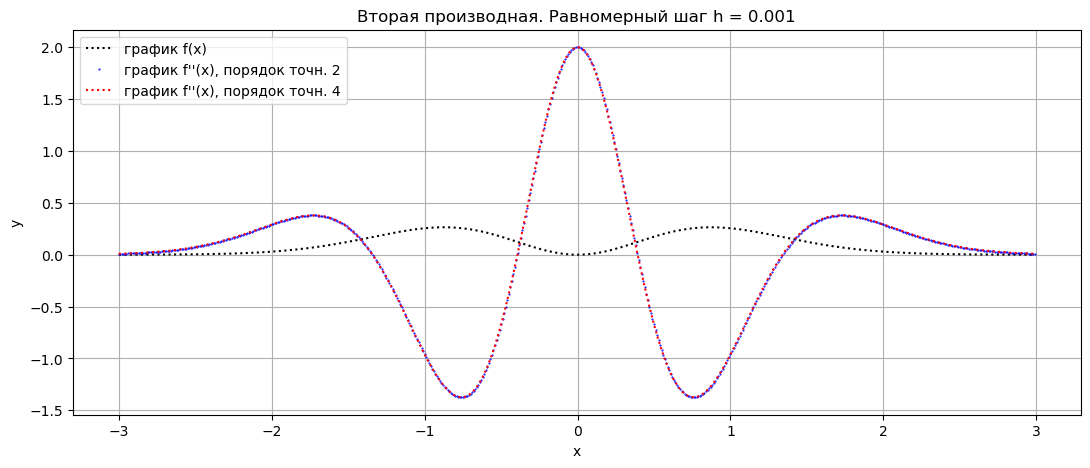

In [14]:
fig = plt.figure(figsize=(13,5)) 

#график f(x)
plt.plot(x, y, ':', color="black", label="график f(x)")
plt.plot(x, y_2derivative_order2, '.', ms=1, color='blue', label="график f''(x), порядок точн. 2")
plt.plot(x, y_2derivative_order4, ':', ms=1, color='red', label="график f''(x), порядок точн. 4")

plt.title(f'Вторая производная. Равномерный шаг h = {h}')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

Text(0.5, 0.98, "Абсолютная погрешность f''(x).  Шаг сетки h = 0.001")

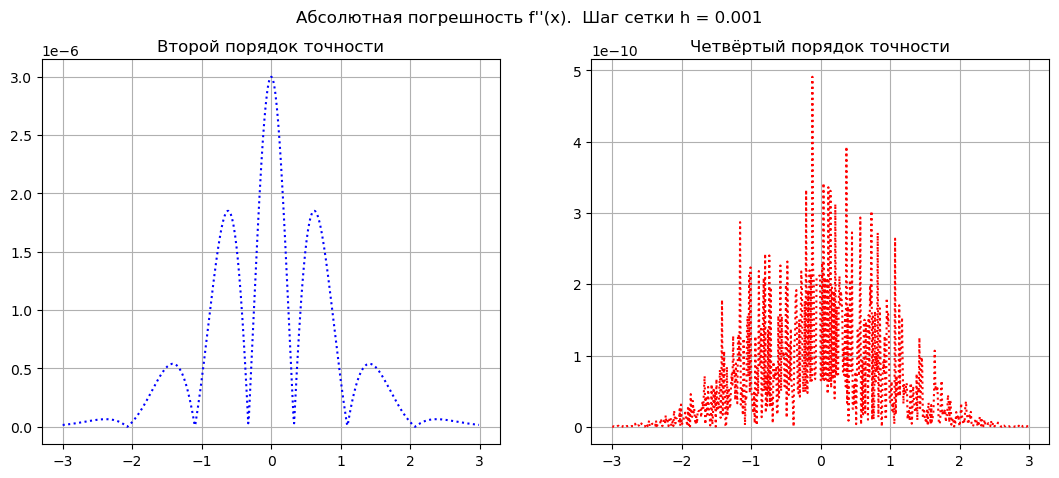

In [15]:
x_sec_der = np.arange(a, b, 0.01)
y_sec_der = function_second_der(x_sec_der)

#второй порядок точности
x_2derivative = np.arange(a, b, 0.01)
y_2derivative_order2 = central_diff_sec_order2(x_2derivative, h)

#четвертый порядок точности
y_2derivative_order4 = central_diff_sec_order4(x_2derivative, h)

fig, axs = plt.subplots(1, 2, figsize=(13,5))

#график абсолютной погрешности f'(x)
axs[0].plot(x_derivative_cent, abs(y_2derivative_order2 - y_sec_der), ':', color='blue', label="абс. погр. 2 порядок точн.")
axs[0].set_title("Второй порядок точности")
axs[0].grid(True)

axs[1].plot(x_derivative_cent, abs(y_2derivative_order4 - y_sec_der), ':', color='red', label="абс. погр. 4 порядок точн.")
axs[1].set_title("Четвёртый порядок точности")
axs[1].grid(True)

fig.suptitle(f'Абсолютная погрешность f\'\'(x).  Шаг сетки h = {h}')

Зависимость погрешности от величины шага h.

[1e-05, 0.0001, 0.001, 0.01, 0.1]


Text(0.5, 0.98, "Погрешности f'(x)")

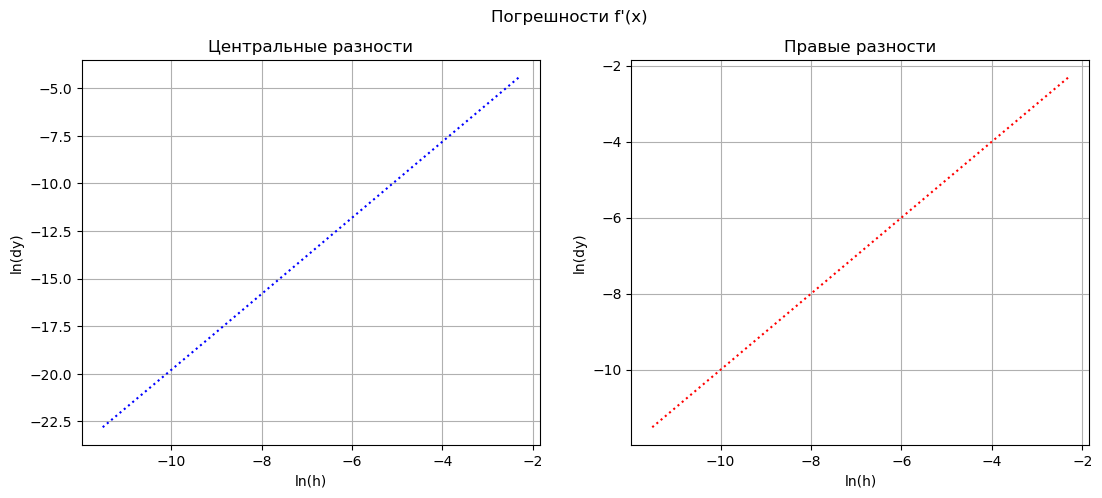

In [16]:
steps = [10**i for i in range(-5, 0, 1)]

dy_cent = list()
dy_right = list()

x = np.arange(a, b, 0.01)
y = function_first_der(x)

for step in steps:  
    y_derivative_cent = central_diff(x, step)
    y_derivative_right = right_diff(x, step)
    
    dy_cent.append(max(abs(y-y_derivative_cent)))
    dy_right.append(max(abs(y-y_derivative_right)))
    
print(steps)

fig, axs = plt.subplots(1, 2, figsize=(13,5))

axs[0].plot(np.log(steps), np.log(dy_cent), ':', color='blue', label="Центральные разности")
axs[0].set_title("Центральные разности")
axs[0].set_xlabel('ln(h)')
axs[0].set_ylabel('ln(dy)')
axs[0].grid(True)

axs[1].plot(np.log(steps), np.log(dy_right), ':', color='red', label="Правые разности")
axs[1].set_title("Правые разности")
axs[1].set_xlabel('ln(h)')
axs[1].set_ylabel('ln(dy)')
axs[1].grid(True)

fig.suptitle(f"Погрешности f\'(x)")
